In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
EXPORT_DIR = "artifacts"
os.makedirs(EXPORT_DIR, exist_ok=True)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## EDA 

In [4]:
print("== Basic Shape ==")
print(df.shape)
print("\n== Columns ==")
print(df.columns.tolist())

print("\n== dtypes ==")
print(df.dtypes)

== Basic Shape ==
(7043, 21)

== Columns ==
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

== dtypes ==
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [5]:
# Convert to numeric; blank strings become NaN, then fill (tenure=0 -> 0)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
missing_total = df["TotalCharges"].isna().sum()
print(f"Missing TotalCharges BEFORE fill: {missing_total}")

Missing TotalCharges BEFORE fill: 11


In [6]:
# Most common approach: customers with tenure=0 often have blank TotalCharges -> set to 0
df["TotalCharges"] = df["TotalCharges"].fillna(0.0)
print("Missing TotalCharges AFTER fill:", df["TotalCharges"].isna().sum())

Missing TotalCharges AFTER fill: 0


In [7]:
# Basic Quality Checks
dups = df["customerID"].duplicated().sum()
print("\nDuplicate customerID:", dups)

print("\n== Quick Missing Value Count ==")
print(df.isna().sum().sort_values(ascending=False).head(10))


Duplicate customerID: 0

== Quick Missing Value Count ==
customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64


Text(0, 0.5, 'Count')

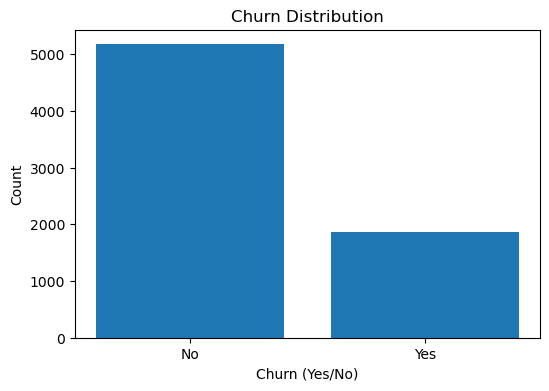

In [8]:
fig1 = plt.figure(figsize=(6,4))
churn_counts = df["Churn"].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.title("Churn Distribution")
plt.xlabel("Churn (Yes/No)")
plt.ylabel("Count")

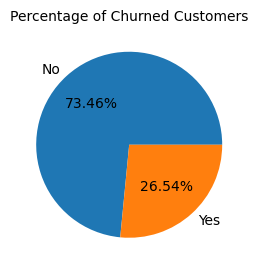

In [9]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

C:\Users\Sami\AppData\Local\Temp\ipykernel_1192\3009931178.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["No", "Yes"], showfliers=False)


Text(0, 0.5, 'MonthlyCharges')

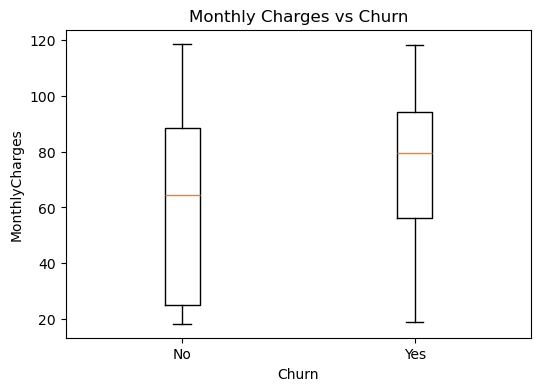

In [10]:
fig2 = plt.figure(figsize=(6,4))
# Convert Churn to numeric copy for plotting positions
tmp = df[["Churn", "MonthlyCharges"]].copy()
# Keep original Yes/No on x-axis by grouping
groups = [tmp[tmp["Churn"] == v]["MonthlyCharges"].values for v in ["No", "Yes"]]
plt.boxplot(groups, labels=["No", "Yes"], showfliers=False)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("MonthlyCharges")

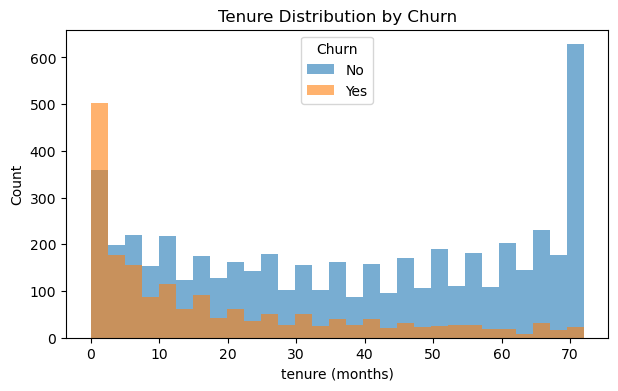

In [14]:
fig3 = plt.figure(figsize=(7,4))
tenure_no = df.loc[df["Churn"] == "No", "tenure"].dropna()
tenure_yes = df.loc[df["Churn"] == "Yes", "tenure"].dropna()
bins = np.linspace(0, df["tenure"].max(), 30)
plt.hist(tenure_no, bins=bins, alpha=0.6, label="No")
plt.hist(tenure_yes, bins=bins, alpha=0.6, label="Yes")
plt.title("Tenure Distribution by Churn")
plt.xlabel("tenure (months)")
plt.ylabel("Count")
plt.legend(title="Churn")

([0, 1, 2],
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

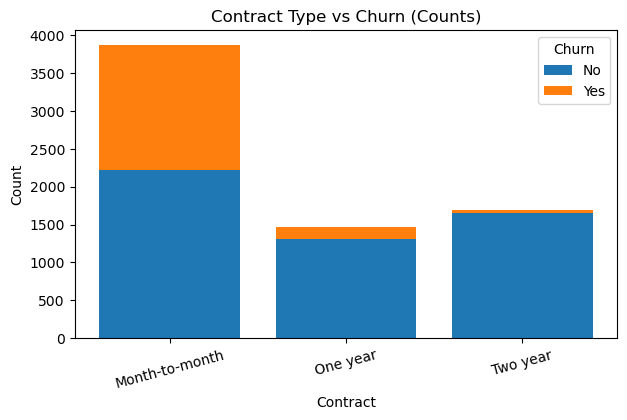

In [13]:
fig4 = plt.figure(figsize=(7,4))
ct = pd.crosstab(df["Contract"], df["Churn"])
bottom = np.zeros(len(ct))
for col in ct.columns:
    plt.bar(ct.index, ct[col].values, bottom=bottom, label=str(col))
    bottom += ct[col].values
plt.title("Contract Type vs Churn (Counts)")
plt.xlabel("Contract")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.xticks(rotation=15)

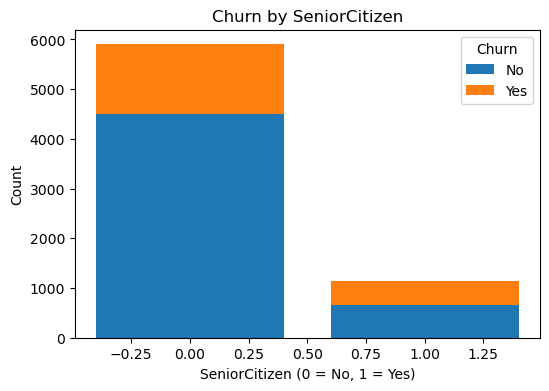

In [15]:
fig5 = plt.figure(figsize=(6,4))
ct2 = pd.crosstab(df["SeniorCitizen"], df["Churn"])
bottom = np.zeros(len(ct2))
for col in ct2.columns:
    plt.bar(ct2.index, ct2[col].values, bottom=bottom, label=str(col))
    bottom += ct2[col].values

plt.title("Churn by SeniorCitizen")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Churn")

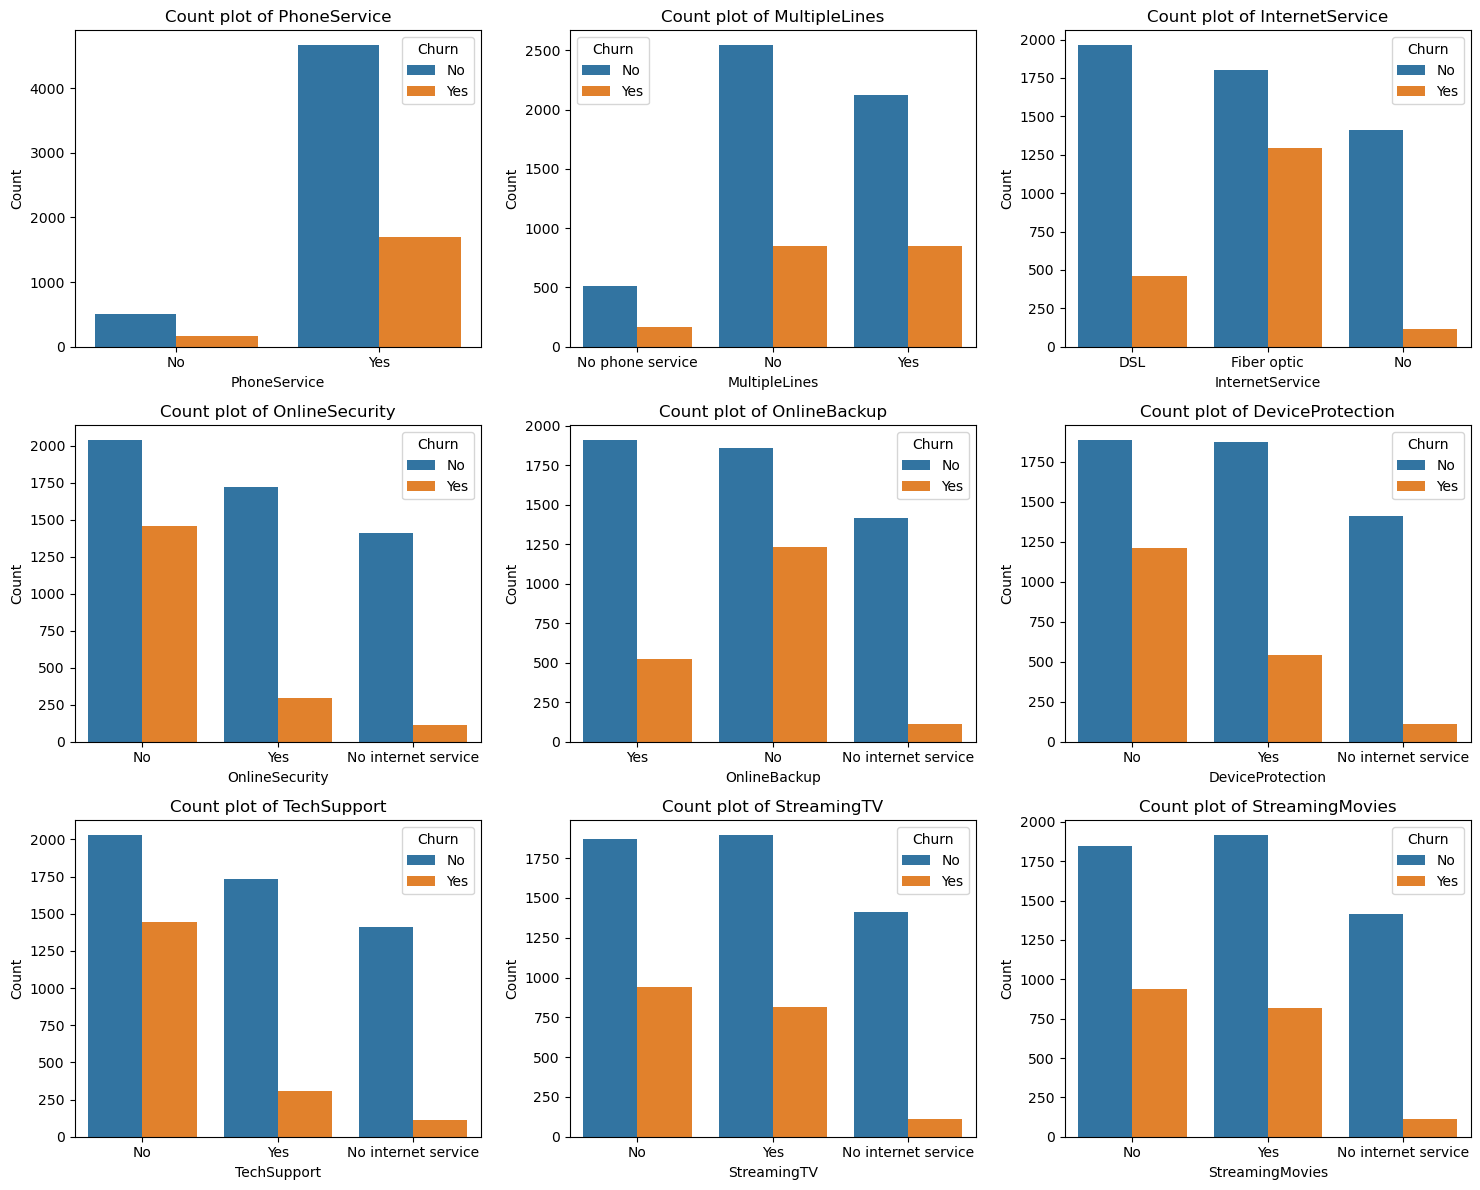

In [16]:
columns = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
            'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                'StreamingMovies']

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig_,axes = plt.subplots(n_rows,n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(columns):
      sns.countplot(x=col, data = df, ax=axes[i], hue=df["Churn"])
      axes[i].set_title(f'Count plot of {col}')
      axes[i].set_xlabel(col)
      axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

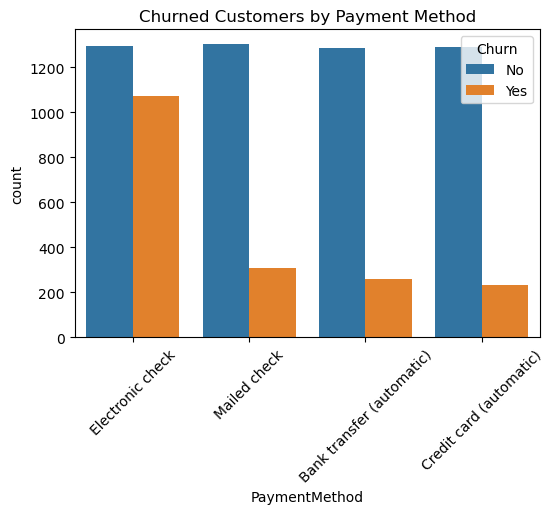

In [17]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation =45)
plt.show()

## Preprocessing

In [18]:
# Drop ID (not predictive)
df2 = df
df2 = df2.drop(columns=["customerID"])

In [19]:
# Normalize binary Yes/No columns to 1/0
yes_no_cols = [
    "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "MultipleLines"
]

def normalize_yes_no(v):
    if isinstance(v, str):
        v_low = v.lower()
        if v_low in ["yes", "no"]:
            return 1 if v_low == "yes" else 0
        if "no internet" in v_low or "no phone" in v_low:
            return 0
    return v  

for col in yes_no_cols:
    if col in df2.columns:
        df2[col] = df2[col].apply(normalize_yes_no)

In [20]:
# Ensure numeric types
num_cols_expected_float = ["MonthlyCharges", "TotalCharges"]
for c in num_cols_expected_float:
    df2[c] = pd.to_numeric(df2[c], errors="coerce")

In [21]:
df2["NEW_CONTRACT_LENGTH"] = df2["Contract"].apply(lambda x: "yearly" if x in ["One year", "Two year"] else "monthly")
df2["NEW_PAYMENT_METHOD"] = df2["PaymentMethod"].apply(lambda x: "elect" if x in ['Electronic check',
                                                                                'Bank transfer (automatic)',
                                                                                "Credit card (automatic)"] else "no_elect")

In [22]:
service_binary_cols = [
    "PhoneService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]
existing_for_count = [c for c in service_binary_cols if c in df.columns]
df2["ServicesCount"] = df2[existing_for_count].sum(axis=1)

In [23]:
df2["AvgChargesPerMonth"] = df2["TotalCharges"] / (df2["tenure"].replace(0, np.nan))
df2["AvgChargesPerMonth"] = df2["AvgChargesPerMonth"].fillna(df2["MonthlyCharges"])

In [24]:
df2["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [25]:
# Feature Engineering

df2.loc[(df2["tenure"] >= 0) & (df2["tenure"] <= 12), "NEW_TENURE"] = "1-year"
df2.loc[(df2["tenure"] > 12) & (df2["tenure"] <= 24), "NEW_TENURE"] = "2-year"
df2.loc[(df2["tenure"] > 24) & (df2["tenure"] <= 36), "NEW_TENURE"] = "3-year"
df2.loc[(df2["tenure"] > 36) & (df2["tenure"] <= 48), "NEW_TENURE"] = "4-year"
df2.loc[(df2["tenure"] > 48) & (df2["tenure"] <= 60), "NEW_TENURE"] = "5-year"
df2.loc[(df2["tenure"] > 60) & (df2["tenure"] <= 72), "NEW_TENURE"] = "6-year"

In [26]:
# Ordinal Encoding for selected categorical columns
from sklearn.preprocessing import OrdinalEncoder

multi_cat_cols = ["InternetService", "Contract", "PaymentMethod", "gender", "NEW_CONTRACT_LENGTH", "NEW_PAYMENT_METHOD", "NEW_TENURE"]

ord_enc = OrdinalEncoder()

df2[multi_cat_cols] = ord_enc.fit_transform(df2[multi_cat_cols])

In [27]:
# Standardize numerical cols so the algorithms won’t give bigger importance to these values comparing to the other cols
from sklearn.preprocessing import StandardScaler
num_col = ['MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth']
scaler = StandardScaler()
df2[num_col] = scaler.fit_transform(df2[num_col])

In [28]:
df3 = df2.drop(columns=['tenure'])
df3.columns = [x.lower() for x in df3.columns]

In [29]:
df3

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,...,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,new_contract_length,new_payment_method,servicescount,avgchargespermonth,new_tenure
0,0.0,0,1,0,0,0,0.0,0,1,0,...,1,2.0,-1.160323,-0.992611,0,0.0,0.0,1,-1.156529,0.0
1,1.0,0,0,0,1,0,0.0,1,0,1,...,0,3.0,-0.259629,-0.172165,0,1.0,1.0,3,-0.304408,2.0
2,1.0,0,0,0,1,0,0.0,1,1,0,...,1,3.0,-0.362660,-0.958066,1,0.0,1.0,3,-0.354049,0.0
3,1.0,0,0,0,0,0,0.0,1,0,1,...,0,0.0,-0.746535,-0.193672,0,1.0,0.0,3,-0.790302,3.0
4,0.0,0,0,0,1,0,1.0,0,0,0,...,1,2.0,0.197365,-0.938874,1,0.0,0.0,1,0.366444,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1,1,1,1,0.0,1,0,1,...,1,3.0,0.665992,-0.127605,0,1.0,1.0,6,0.602054,1.0
7039,0.0,0,1,1,1,1,1.0,0,1,1,...,1,1.0,1.277533,2.242606,0,1.0,0.0,5,1.242216,5.0
7040,0.0,0,1,1,0,0,0.0,1,0,0,...,1,2.0,-1.168632,-0.852932,0,0.0,0.0,1,-1.102022,0.0
7041,1.0,1,1,0,1,1,1.0,0,0,0,...,1,3.0,0.320338,-0.870513,1,0.0,1.0,1,0.393773,0.0


## Model Development + Evaluation

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
y = df3["churn"].astype(int)
X = df3.drop(columns=["churn"])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Train/Valid/Test sizes:", X_train.shape, X_valid.shape, X_test.shape)

Train/Valid/Test sizes: (4930, 23) (1056, 23) (1057, 23)


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [34]:
# Handle class imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Class balance BEFORE SMOTE:", Counter(y_train))
print("Class balance AFTER  SMOTE:", Counter(y_train_sm))

Class balance BEFORE SMOTE: Counter({0: 3622, 1: 1308})
Class balance AFTER  SMOTE: Counter({0: 3622, 1: 3622})



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       776
           1       0.54      0.76      0.63       280

    accuracy                           0.76      1056
   macro avg       0.72      0.76      0.73      1056
weighted avg       0.80      0.76      0.77      1056

ROC-AUC: 0.835909885861561


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

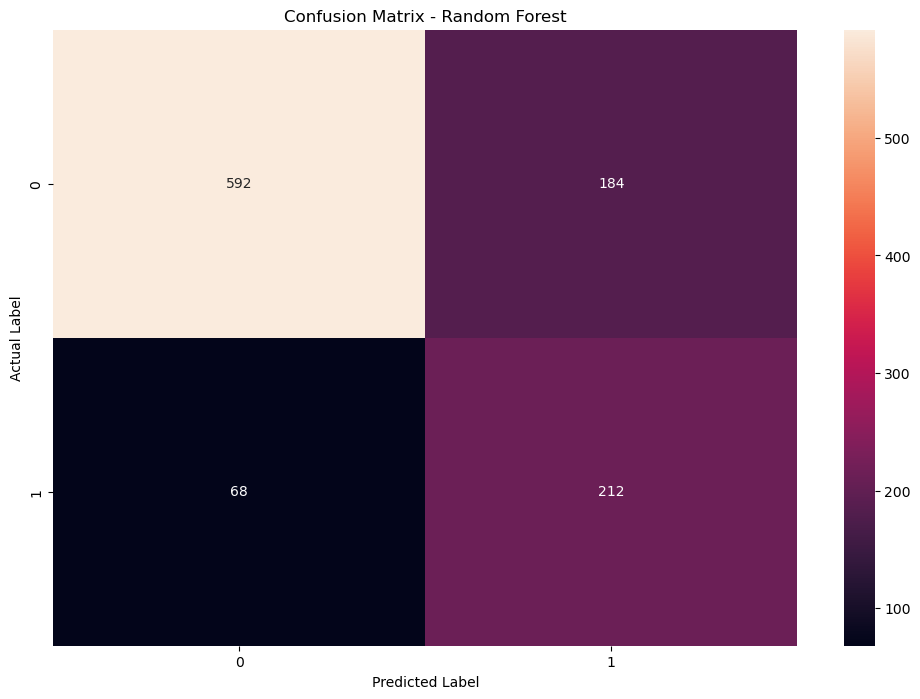

In [51]:
# Model Training 

# Random Forest 
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train_sm, y_train_sm)

y_pred_rf = rf.predict(X_valid)
print("\n=== Random Forest ===")
print(classification_report(y_valid, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_valid, rf.predict_proba(X_valid)[:, 1]))

confusion_matrix_rf = confusion_matrix(y_valid, y_pred_rf)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

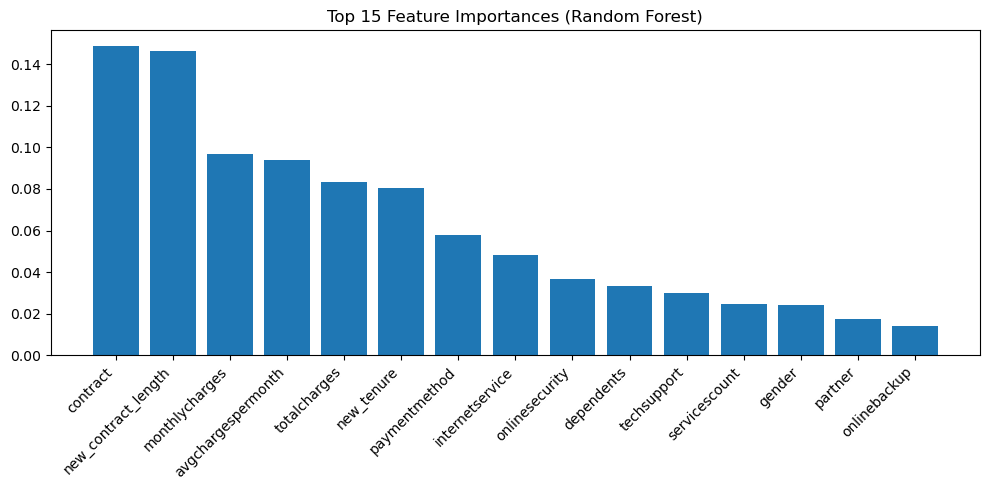

In [36]:
# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feat_names = X_train.columns

# Plot
plt.figure(figsize=(10,5))
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), [feat_names[i] for i in indices[:15]], rotation=45, ha="right")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       776
           1       0.52      0.75      0.61       280

    accuracy                           0.75      1056
   macro avg       0.71      0.75      0.71      1056
weighted avg       0.79      0.75      0.76      1056

ROC-AUC: 0.8227379418262151


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

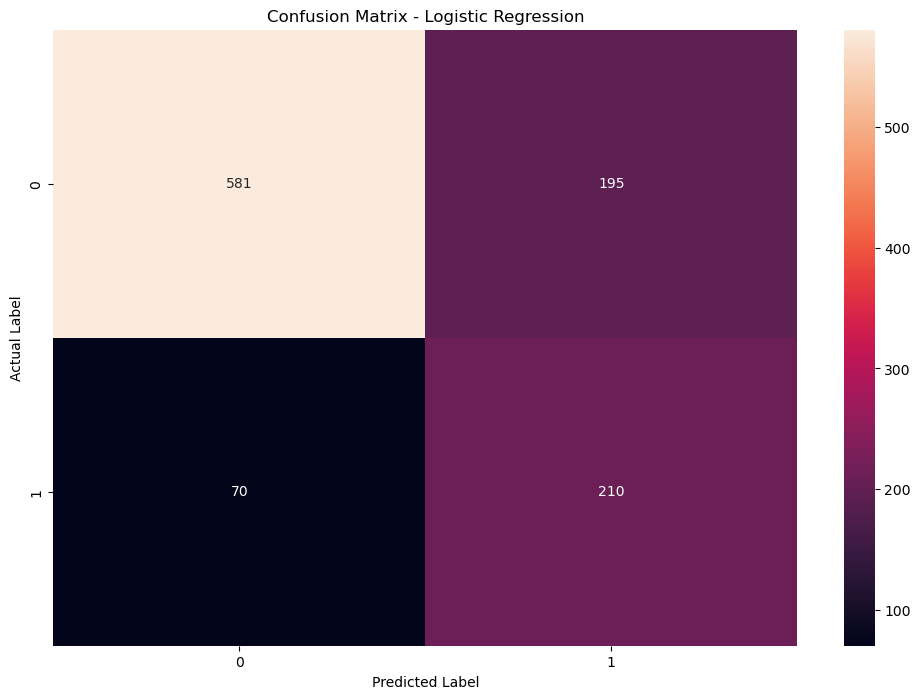

In [54]:
# Logistic Regression 

log_reg_sm = LogisticRegression(max_iter=500, solver="liblinear")
log_reg_sm.fit(X_train_sm, y_train_sm)

y_pred_lr = log_reg_sm.predict(X_valid)
print("\n=== Logistic Regression ===")
print(classification_report(y_valid, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_valid, log_reg_sm.predict_proba(X_valid)[:, 1]))

confusion_matrix_lr = confusion_matrix(y_valid, y_pred_lr)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_lr, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])


=== Gradient Boosting (SMOTE) ===
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       776
           1       0.54      0.72      0.62       280

    accuracy                           0.77      1056
   macro avg       0.72      0.75      0.73      1056
weighted avg       0.80      0.77      0.78      1056

ROC-AUC: 0.8348697533136966


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

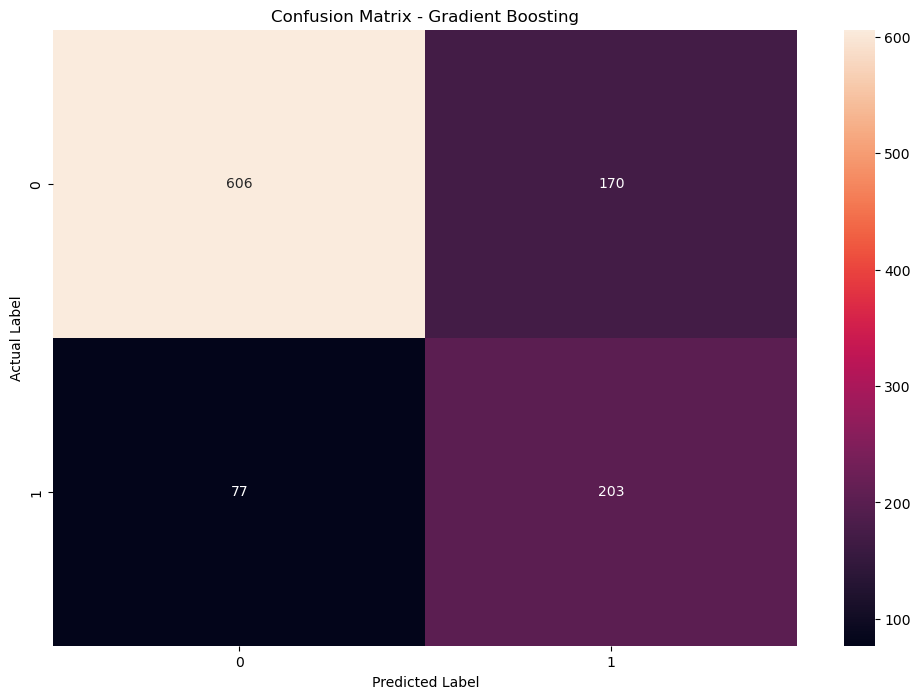

In [60]:
# Gradient Boosting
gb_sm = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_sm.fit(X_train_sm, y_train_sm)

y_pred_gb = gb_sm.predict(X_valid)
print("\n=== Gradient Boosting (SMOTE) ===")
print(classification_report(y_valid, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_valid, gb_sm.predict_proba(X_valid)[:, 1]))

confusion_matrix_gb = confusion_matrix(y_valid, y_pred_gb)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])


=== KNN ===
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       776
           1       0.49      0.77      0.60       280

    accuracy                           0.72      1056
   macro avg       0.69      0.74      0.69      1056
weighted avg       0.79      0.72      0.74      1056

ROC-AUC: 0.7948499631811488


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

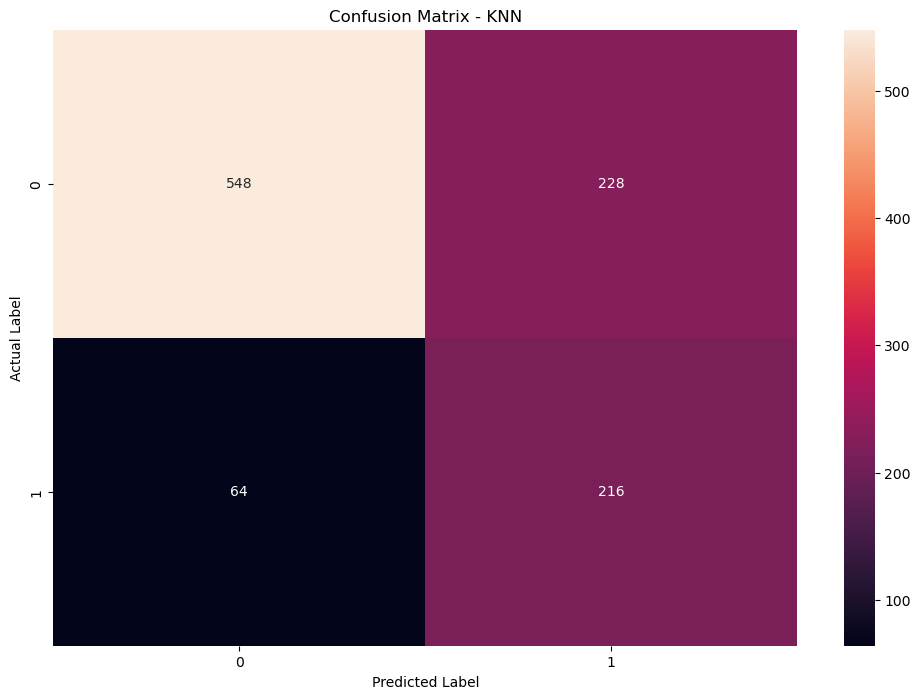

In [55]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_sm = KNeighborsClassifier(n_neighbors=10)
knn_sm.fit(X_train_sm, y_train_sm)

y_pred_knn = knn_sm.predict(X_valid)
print("\n=== KNN ===")
print(classification_report(y_valid, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_valid, knn_sm.predict_proba(X_valid)[:, 1]))

confusion_matrix_knn = confusion_matrix(y_valid, y_pred_knn)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_knn, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - KNN')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])


=== AdaBoost ===
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       776
           1       0.51      0.80      0.62       280

    accuracy                           0.74      1056
   macro avg       0.71      0.76      0.71      1056
weighted avg       0.80      0.74      0.76      1056

ROC-AUC: 0.8323499631811487


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

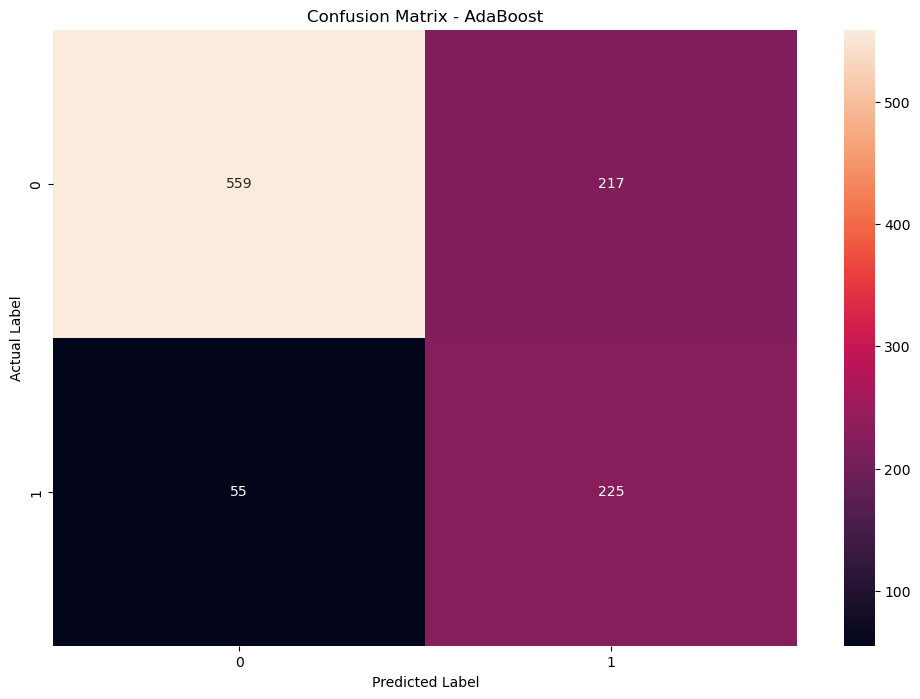

In [57]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    n_estimators=200,           
    learning_rate=0.5,          
    random_state=42
)
ada.fit(X_train_sm, y_train_sm)

y_pred_ada = ada.predict(X_valid)
print("\n=== AdaBoost ===")
print(classification_report(y_valid, y_pred_ada))
print("ROC-AUC:", roc_auc_score(y_valid, ada.predict_proba(X_valid)[:, 1]))

confusion_matrix_ada = confusion_matrix(y_valid, y_pred_ada)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ada, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - AdaBoost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [58]:
y_valid.value_counts()

churn
0    776
1    280
Name: count, dtype: int64

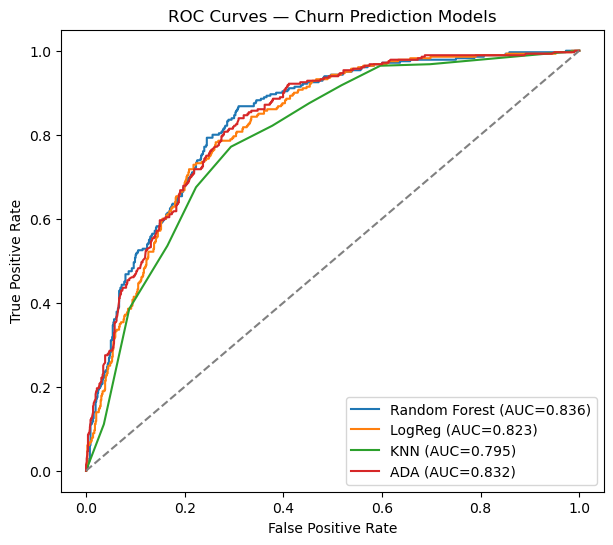

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

models = {
    "Random Forest": rf,
    "LogReg": log_reg_sm,
    "KNN": knn_sm,
    "ADA": ada
}

plt.figure(figsize=(7,6))

for name, model in models.items():
    if name in ["LogReg", "KNN"]:
        if name == "LogReg":
            probs = model.predict_proba(X_valid)[:,1]
        else:
            probs = model.predict_proba(X_valid)[:,1]
    else:
        probs = model.predict_proba(X_valid)[:,1]
    
    fpr, tpr, _ = roc_curve(y_valid, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc(fpr,tpr):.3f})")

plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Churn Prediction Models")
plt.legend()
plt.show()

#### Considering that recall is the metric that tells us how well our model predicts the class we want to predict and that we have 280 customers who left in the y_tvalid set, Ada Boost is the best model.
#### Ada Boost Classifier correctly predicted that 225 out of 280 clients were more likely to churn, with a 80% recall
#### I’ll use RandomizedSearchCV to test different parameters for Ada Boost in order to increase recall.

In [62]:
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
grid = {'n_estimators' : [50,100,500,1500,2000],
      'learning_rate' : [0.05,0.1,1.0,0.15,0.2,1.5,2.0]}
cv = ShuffleSplit()
adaboost = RandomizedSearchCV(AdaBoostClassifier(),
                            param_distributions = grid,
                            cv = cv,
                            n_iter = 10,
                            scoring = 'recall')
adaboost.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
                   estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.05, 0.1, 1.0, 0.15,
                                                          0.2, 1.5, 2.0],
                                        'n_estimators': [50, 100, 500, 1500,
                                                         2000]},
                   scoring='recall')


=== AdaBoost Tunned ===
              precision    recall  f1-score   support

           0       0.94      0.59      0.72       776
           1       0.44      0.90      0.59       280

    accuracy                           0.67      1056
   macro avg       0.69      0.74      0.66      1056
weighted avg       0.81      0.67      0.69      1056

ROC-AUC: 0.8323499631811487


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

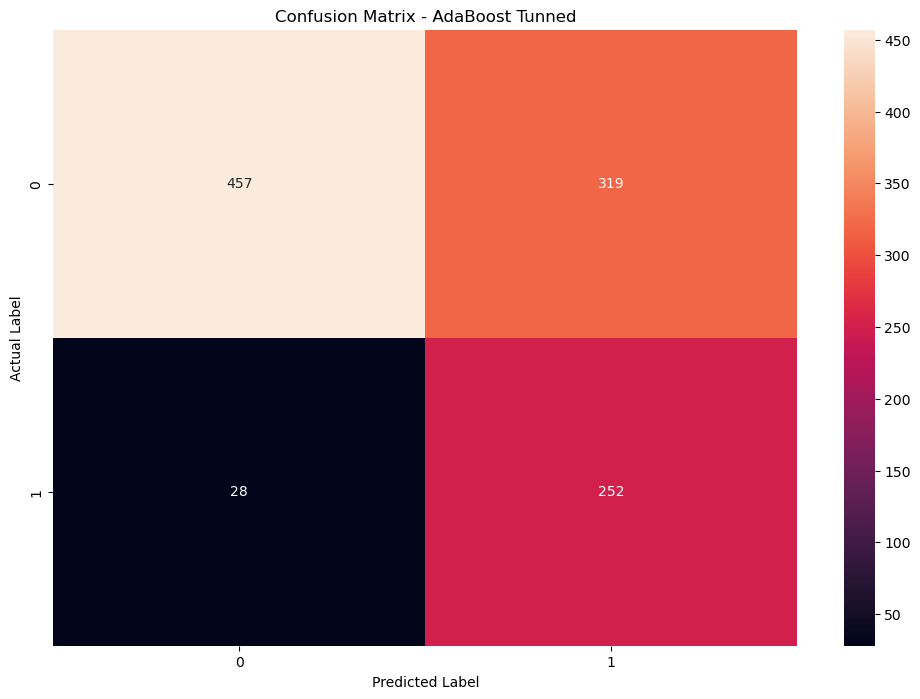

In [63]:
y_pred_ada = adaboost.predict(X_valid)
print("\n=== AdaBoost Tunned ===")
print(classification_report(y_valid, y_pred_ada))
print("ROC-AUC:", roc_auc_score(y_valid, ada.predict_proba(X_valid)[:, 1]))

confusion_matrix_ada = confusion_matrix(y_valid, y_pred_ada)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ada, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - AdaBoost Tunned')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

#### Another way of tuning is upsampling with SMOTEENN

In [68]:
from imblearn.combine import SMOTEENN
from collections import Counter

smoteen = SMOTEENN()
x_upSampled, y_upSampled = smoteen.fit_resample(X_train, y_train)

print("\nClass balance BEFORE SMOTE:", Counter(y_train))
print("Class balance AFTER  SMOTE:", Counter(y_upSampled))


Class balance BEFORE SMOTE: Counter({0: 3622, 1: 1308})
Class balance AFTER  SMOTE: Counter({1: 2731, 0: 1905})



=== AdaBoost Tunned with SMOTEEN ===
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       776
           1       0.45      0.90      0.60       280

    accuracy                           0.69      1056
   macro avg       0.70      0.75      0.67      1056
weighted avg       0.81      0.69      0.70      1056

ROC-AUC: 0.8338158136966127


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

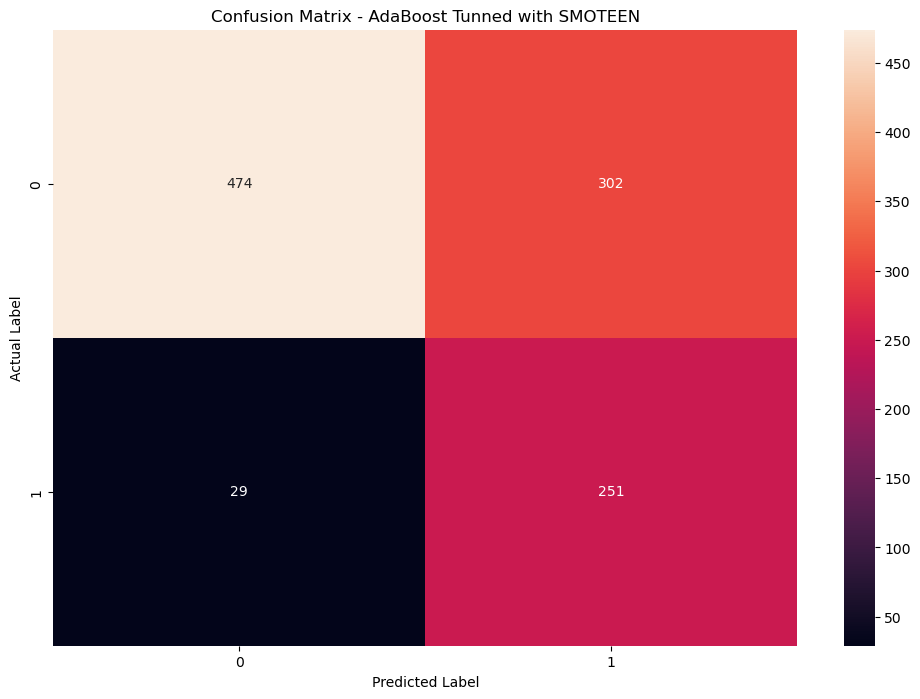

In [71]:
ada2 = AdaBoostClassifier(
    n_estimators=200,           
    learning_rate=0.5,          
    random_state=42
)
ada2.fit(x_upSampled, y_upSampled)
yup_pred = ada2.predict(X_valid)
ada2.score(X_valid,y_valid)

print("\n=== AdaBoost Tunned with SMOTEEN ===")
print(classification_report(y_valid, yup_pred, labels=[0,1]))
print("ROC-AUC:", roc_auc_score(y_valid, ada2.predict_proba(X_valid)[:, 1]))

confusion_matrix_ada2 = confusion_matrix(y_valid, yup_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ada2, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - AdaBoost Tunned with SMOTEEN')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Saving Artifacts for Later Use

In [67]:
import os, json, pickle
with open(os.path.join(EXPORT_DIR, "ordinal_encoder.pkl"), "wb") as f:
    pickle.dump(ord_enc, f)
with open(os.path.join(EXPORT_DIR, "scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)
with open(os.path.join(EXPORT_DIR, "ada_model.pkl"), "wb") as f:
    pickle.dump(ada, f)

### Scratch

In [79]:
y_test.iloc[0]

np.int64(1)

In [78]:
X_test.iloc[0]

gender                 1.000000
seniorcitizen          1.000000
partner                0.000000
dependents             0.000000
phoneservice           1.000000
multiplelines          0.000000
internetservice        0.000000
onlinesecurity         0.000000
onlinebackup           0.000000
deviceprotection       0.000000
techsupport            0.000000
streamingtv            0.000000
streamingmovies        0.000000
contract               0.000000
paperlessbilling       1.000000
paymentmethod          2.000000
monthlycharges        -0.655137
totalcharges          -0.665804
new_contract_length    0.000000
new_payment_method     0.000000
servicescount          1.000000
avgchargespermonth    -0.643756
new_tenure             1.000000
Name: 1639, dtype: float64

In [80]:
df.iloc[1639]

customerID                4690-LLKUA
gender                          Male
SeniorCitizen                      1
Partner                           No
Dependents                        No
tenure                            17
PhoneService                     Yes
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 45.05
TotalCharges                   770.6
Churn                            Yes
Name: 1639, dtype: object

In [82]:
row_df = X_test.iloc[[0]] 

In [87]:
row_df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'new_contract_length', 'new_payment_method',
       'servicescount', 'avgchargespermonth', 'new_tenure'],
      dtype='object')

In [84]:
test_p = ada.predict(row_df)

In [86]:
probs = ada.predict_proba(row_df)[:, 1]
probs

array([0.52382646])